In [1]:
import disk_extraction as de
from astropy.io import fits
import numpy as np
import nmf_imaging
import matplotlib.pyplot as plt
from scipy.ndimage import zoom
from scipy.ndimage import rotate

datafile = '/Users/polaris/emccd_detect/os9_hlc/os9_ccd_images_no_planets.fits'
#main_dir='/Users/polaris/Onedrive-UA/OneDrive - University of Arizona/Debris-Disk-Modelling/Debris-Disk-Modelling/Eps-eri-Roman_pol/Simulations_paper/Revision/Revision_2/HLC_band/'
#dust='Astrosil/'
#disk_file_dir=main_dir+dust
#diskfile =disk_file_dir +'raw_emccd_I135.fits'

In [2]:
diskfile_dir='/Users/polaris/Onedrive-UA/OneDrive - University of Arizona/Debris-Disk-Modelling/Debris-Disk-Modelling/Eps-eri-HST/Updated_model/Su/'
diskfile=diskfile_dir+'raw_emccd_sst.fits'

In [3]:
diskfile.split('_')
t=3

In [4]:
diskfile.split('_')[3]

'sst.fits'

# Process the references without the disk, don't photon count

In [5]:
data = fits.getdata(datafile).astype(float)

dataID1 = de.processcube(data,1,diskfile=None)
dataID6 = de.processcube(data,6,diskfile=None)
dataID7 = de.processcube(data,7,diskfile=None)
dataID12 = de.processcube(data,12,diskfile=None)
dataID13 = de.processcube(data,13,diskfile=None)
dataID18 = de.processcube(data,18,diskfile=None)

# Component box
refbox = np.zeros([334,67,67])
refbox[0:59] = dataID1
refbox[60:124] = dataID6
refbox[125:184] = dataID7
refbox[185:249] = dataID12
refbox[250:309] = dataID13
refbox[310:335] = dataID18

# Pretty sure this means you are missing a row
refbox[refbox<=0] = 1e-12
refbox[refbox==np.nan] == 1e-12
refbox[refbox==np.inf] == 1e-12

array([], dtype=bool)

# Grab the raw data with disk, don't photon count

disk array shape =  (48, 48, 50)


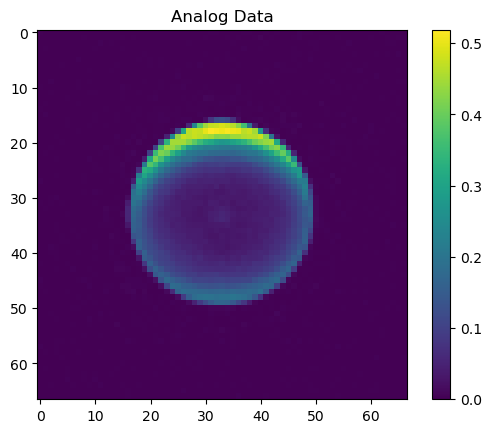

disk array shape =  (48, 48, 50)


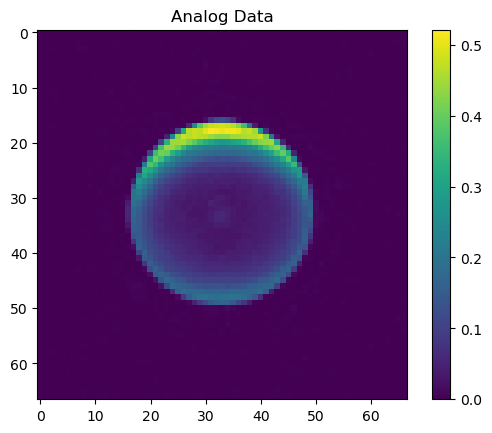

disk array shape =  (48, 48, 50)


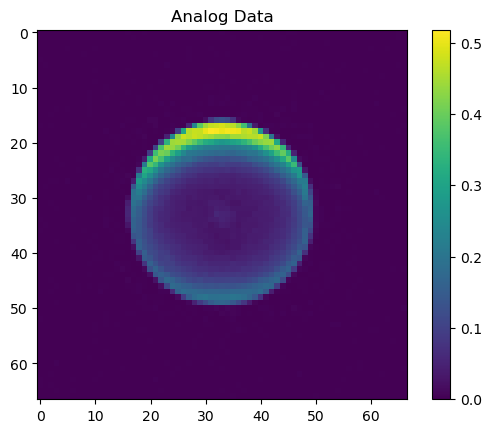

disk array shape =  (48, 48, 50)


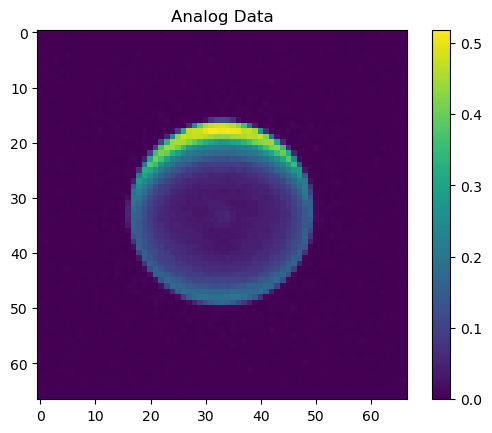

disk array shape =  (48, 48, 50)


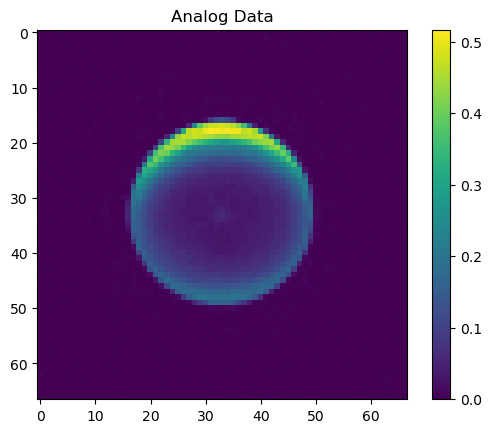

disk array shape =  (48, 48, 50)


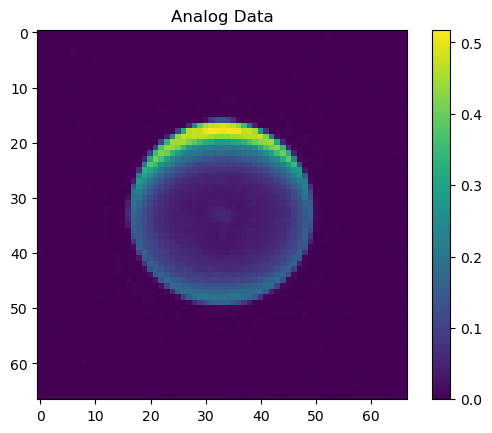

disk array shape =  (48, 48, 50)


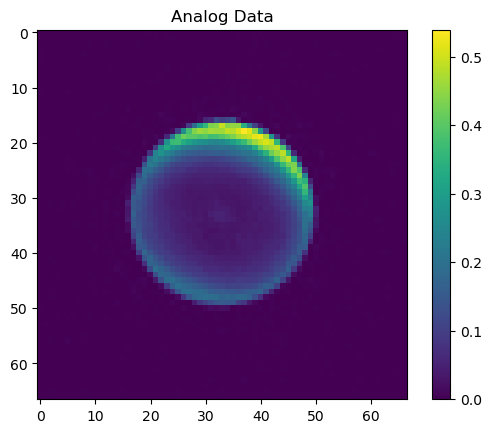

disk array shape =  (48, 48, 50)


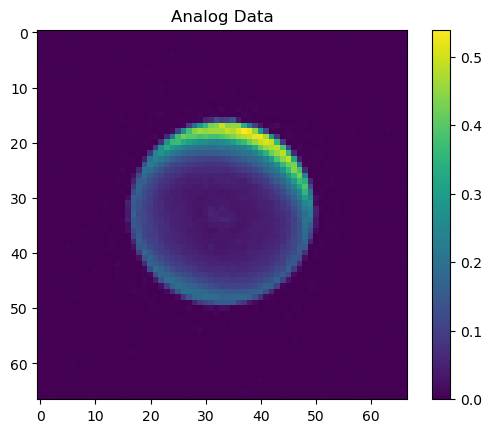

disk array shape =  (48, 48, 50)


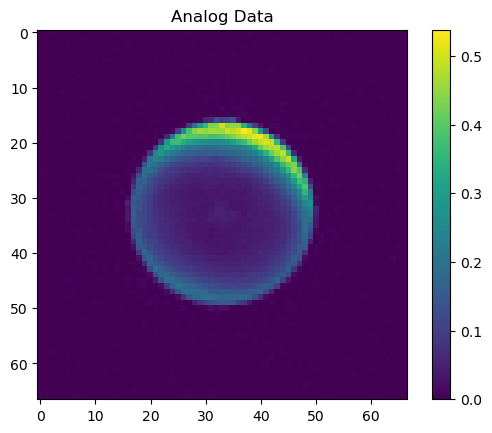

disk array shape =  (48, 48, 50)


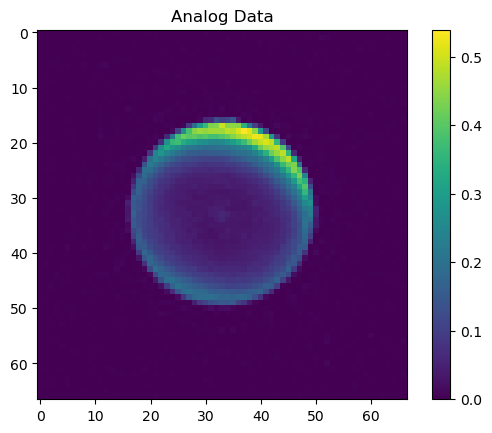

disk array shape =  (48, 48, 50)


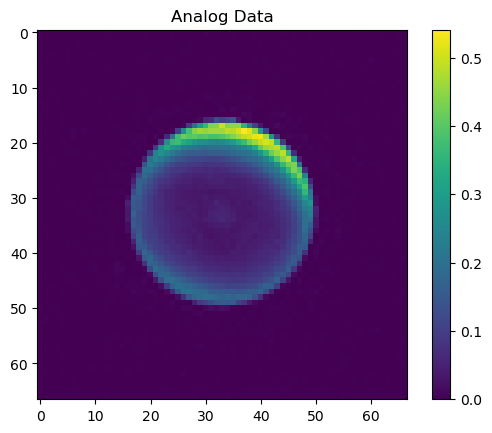

disk array shape =  (48, 48, 50)


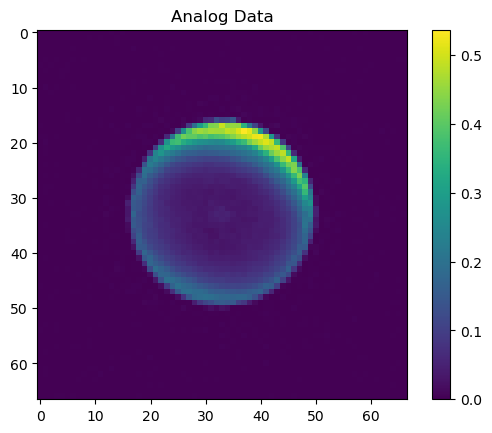

In [6]:
df = diskfile 
mode = 'Analog'
data = fits.getdata(datafile)

# -11 Deg
dataID2 = de.processcube(data,2,diskfile=df,mode=mode)
dataID4 = de.processcube(data,4,diskfile=df,mode=mode)
dataID9 = de.processcube(data,9,diskfile=df,mode=mode)
dataID11 = de.processcube(data,11,diskfile=df,mode=mode)
dataID14 = de.processcube(data,14,diskfile=df,mode=mode)
dataID16 = de.processcube(data,16,diskfile=df,mode=mode)

# +11 Deg
dataID3 = de.processcube(data,3,diskfile=df,mode=mode)
dataID5 = de.processcube(data,5,diskfile=df,mode=mode)
dataID8 = de.processcube(data,8,diskfile=df,mode=mode)
dataID10 = de.processcube(data,10,diskfile=df,mode=mode)
dataID15 = de.processcube(data,15,diskfile=df,mode=mode)
dataID17 = de.processcube(data,17,diskfile=df,mode=mode)

# -11 Target NMF Box
rm11box_disk = np.zeros([6,67,67])
rm11box_disk[0] = dataID2
rm11box_disk[1] = dataID4
rm11box_disk[2] = dataID9
rm11box_disk[3] = dataID11
rm11box_disk[4] = dataID14
rm11box_disk[5] = dataID16

# +11 Target NMF Box
rp11box_disk = np.zeros([6,67,67])
rp11box_disk[0] = dataID3
rp11box_disk[1] = dataID5
rp11box_disk[2] = dataID8
rp11box_disk[3] = dataID10
rp11box_disk[4] = dataID15
rp11box_disk[5] = dataID17

In [245]:
np.shape(data)

(14735, 67, 67)

# Grab the raw data without disk, don't photon count

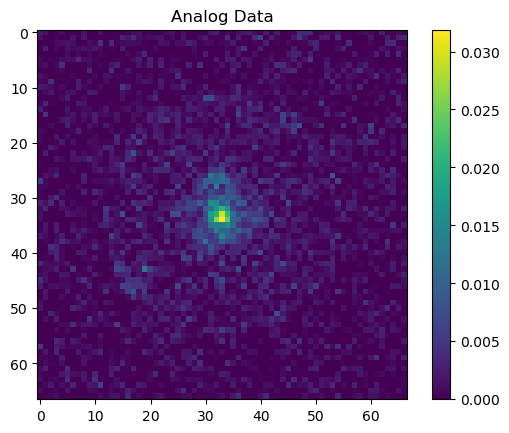

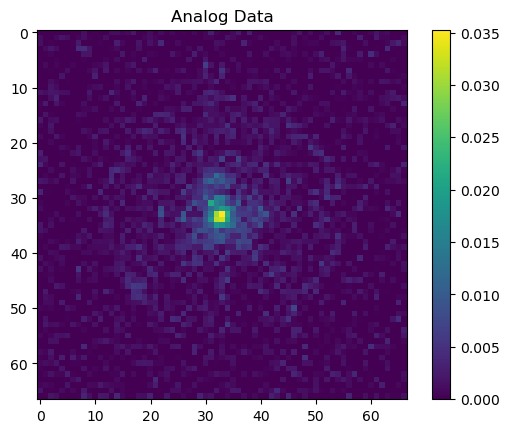

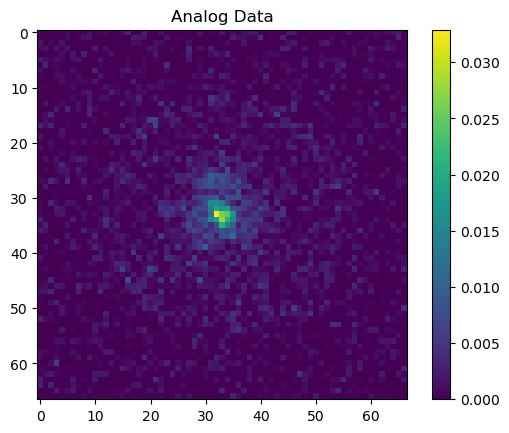

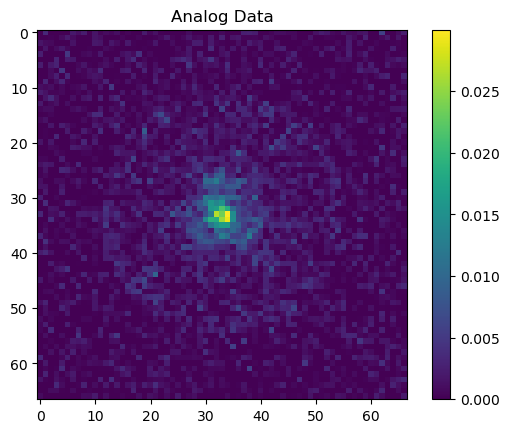

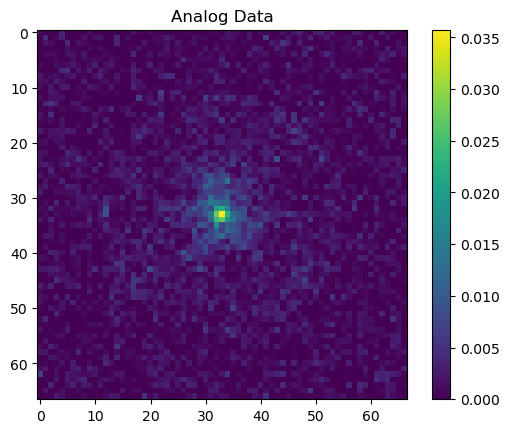

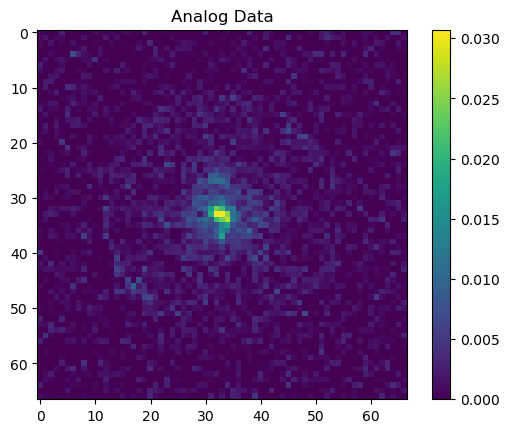

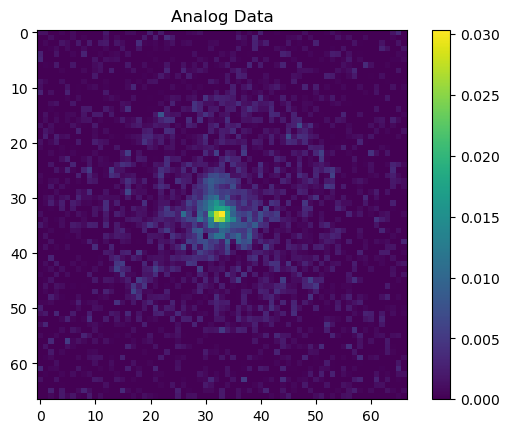

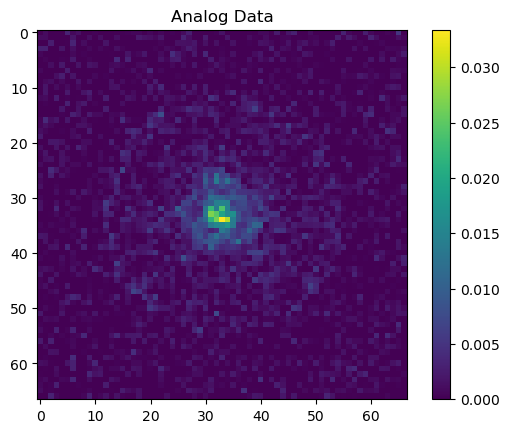

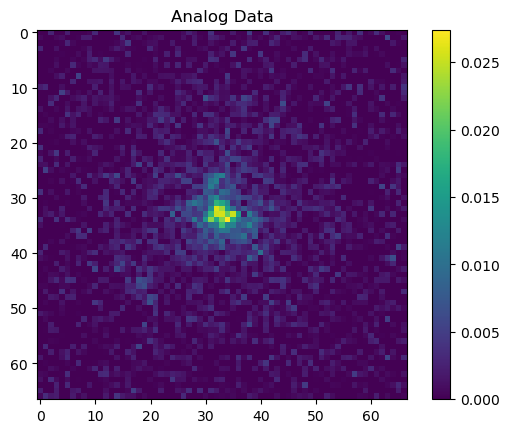

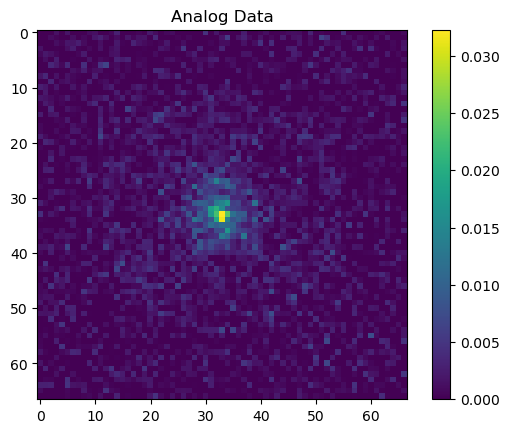

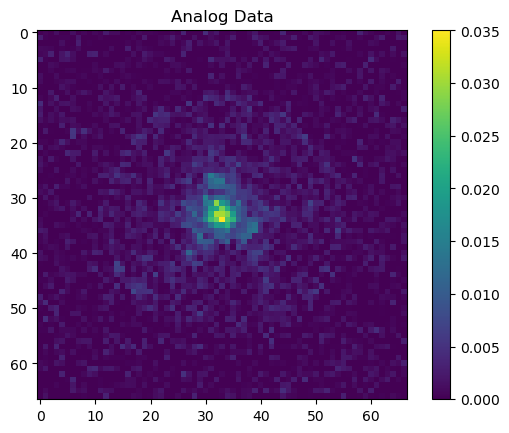

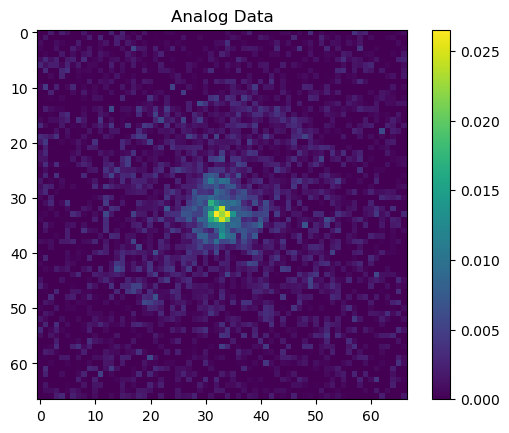

In [7]:
df = None
mode = 'Analog'
data = fits.getdata(datafile).astype(float)

# -11 Deg
dataID2_nd = de.processcube(data,2,diskfile=df,mode=mode)
dataID4_nd = de.processcube(data,4,diskfile=df,mode=mode)
dataID9_nd = de.processcube(data,9,diskfile=df,mode=mode)
dataID11_nd = de.processcube(data,11,diskfile=df,mode=mode)
dataID14_nd = de.processcube(data,14,diskfile=df,mode=mode)
dataID16_nd = de.processcube(data,16,diskfile=df,mode=mode)

# +11 Deg
dataID3_nd = de.processcube(data,3,diskfile=df,mode=mode)
dataID5_nd = de.processcube(data,5,diskfile=df,mode=mode)
dataID8_nd = de.processcube(data,8,diskfile=df,mode=mode)
dataID10_nd = de.processcube(data,10,diskfile=df,mode=mode)
dataID15_nd = de.processcube(data,15,diskfile=df,mode=mode)
dataID17_nd = de.processcube(data,17,diskfile=df,mode=mode)

# -11 Target NMF Box
rm11box_nd = np.zeros([6,67,67])
rm11box_nd[0] = dataID2_nd
rm11box_nd[1] = dataID4_nd
rm11box_nd[2] = dataID9_nd
rm11box_nd[3] = dataID11_nd
rm11box_nd[4] = dataID14_nd
rm11box_nd[5] = dataID16_nd

# +11 Target NMF Box
rp11box_nd = np.zeros([6,67,67])
rp11box_nd[0] = dataID3_nd
rp11box_nd[1] = dataID5_nd
rp11box_nd[2] = dataID8_nd
rp11box_nd[3] = dataID10_nd
rp11box_nd[4] = dataID15_nd
rp11box_nd[5] = dataID17_nd

# Raw disks

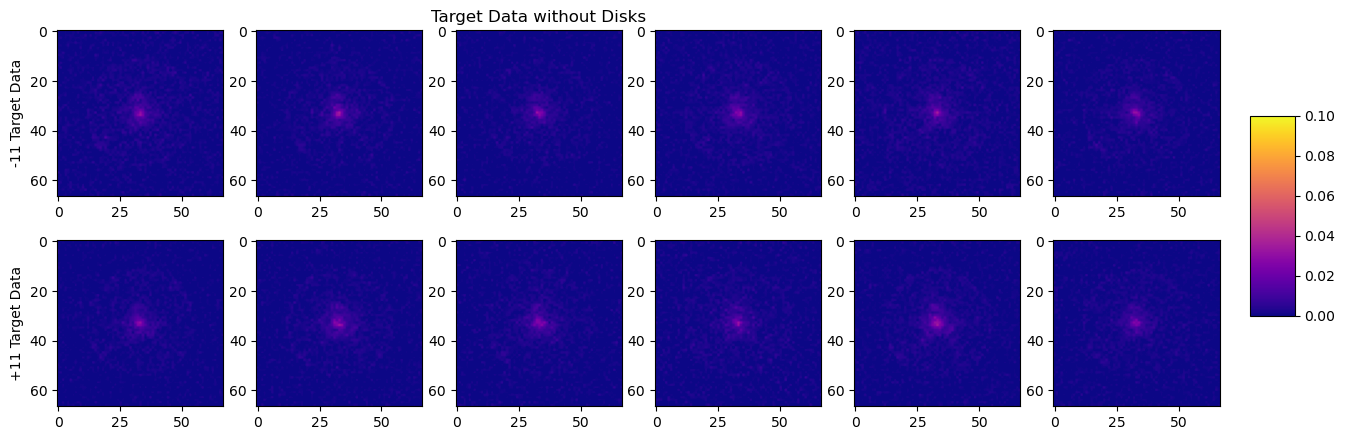

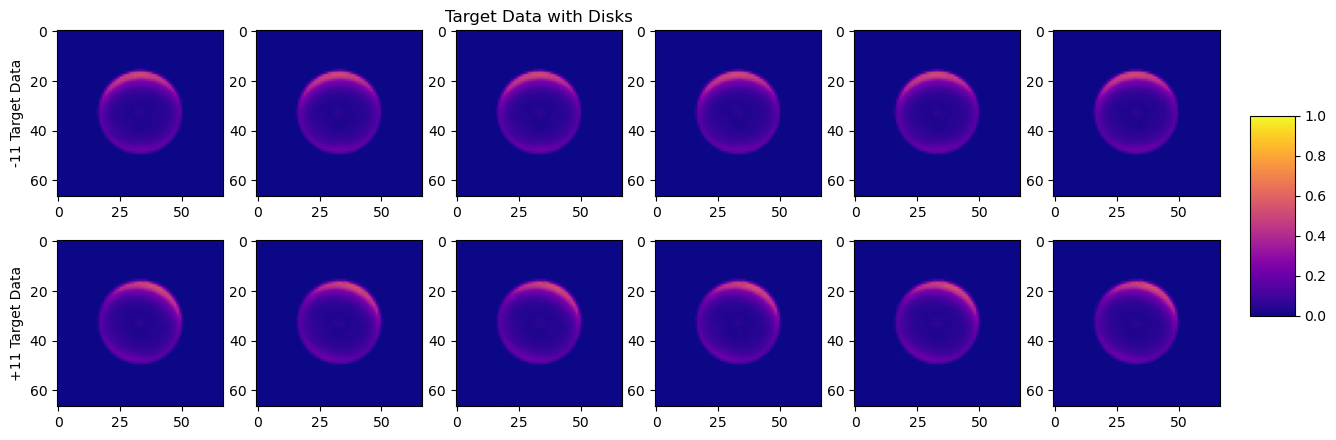

In [8]:
import matplotlib.pyplot as plt
vmin = 0
vmax = 0.1
fig,ax = plt.subplots(ncols=6,nrows=2,figsize=[15,5])
plt.set_cmap('plasma')

ax[0,2].set_title('Target Data without Disks')
ax[0,0].imshow(rm11box_nd[0],vmin=vmin,vmax=vmax)
ax[0,1].imshow(rm11box_nd[1],vmin=vmin,vmax=vmax)
ax[0,2].imshow(rm11box_nd[2],vmin=vmin,vmax=vmax)
ax[0,3].imshow(rm11box_nd[3],vmin=vmin,vmax=vmax)
ax[0,4].imshow(rm11box_nd[4],vmin=vmin,vmax=vmax)
cmap = ax[0,5].imshow(rm11box_nd[5],vmin=vmin,vmax=vmax)
cbax = fig.add_axes([0.92,0.3,0.03,0.4])
ax[0,0].set_ylabel('-11 Target Data')
ax[1,0].imshow(rp11box_nd[0],vmin=vmin,vmax=vmax)
ax[1,1].imshow(rp11box_nd[1],vmin=vmin,vmax=vmax)
ax[1,2].imshow(rp11box_nd[2],vmin=vmin,vmax=vmax)
ax[1,3].imshow(rp11box_nd[3],vmin=vmin,vmax=vmax)
ax[1,4].imshow(rp11box_nd[4],vmin=vmin,vmax=vmax)
ax[1,5].imshow(rp11box_nd[5],vmin=vmin,vmax=vmax)
ax[1,0].set_ylabel('+11 Target Data')
cb = plt.colorbar(cmap,cax=cbax)
plt.show()

vmin = 0
vmax = 1

fig,ax = plt.subplots(ncols=6,nrows=2,figsize=[15,5])
plt.set_cmap('plasma')
ax[0,2].set_title('Target Data with Disks')
ax[0,0].imshow(rm11box_disk[0],vmin=vmin,vmax=vmax)
ax[0,1].imshow(rm11box_disk[1],vmin=vmin,vmax=vmax)
ax[0,2].imshow(rm11box_disk[2],vmin=vmin,vmax=vmax)
ax[0,3].imshow(rm11box_disk[3],vmin=vmin,vmax=vmax)
ax[0,4].imshow(rm11box_disk[4],vmin=vmin,vmax=vmax)
cmap = ax[0,5].imshow(rm11box_disk[5],vmin=vmin,vmax=vmax)
cbax = fig.add_axes([0.92,0.3,0.03,0.4])
ax[0,0].set_ylabel('-11 Target Data')
ax[1,0].imshow(rp11box_disk[0],vmin=vmin,vmax=vmax)
ax[1,1].imshow(rp11box_disk[1],vmin=vmin,vmax=vmax)
ax[1,2].imshow(rp11box_disk[2],vmin=vmin,vmax=vmax)
ax[1,3].imshow(rp11box_disk[3],vmin=vmin,vmax=vmax)
ax[1,4].imshow(rp11box_disk[4],vmin=vmin,vmax=vmax)
ax[1,5].imshow(rp11box_disk[5],vmin=vmin,vmax=vmax)
ax[1,0].set_ylabel('+11 Target Data')
cb = plt.colorbar(cmap,cax=cbax)
plt.show()

# NMF Subtraction

# Mask values that NMF doesn't like

In [248]:
np.shape(dataID2)

(67, 67)

# Evaluation of speckle attenuation
Compute the median and standard deviation of the +11 and -11 cases

In [9]:
rM11_wd_nc = rm11box_disk
rP11_wd_nc = rp11box_disk

rM11_nd_nc = rm11box_nd
rP11_nd_nc = rp11box_nd



from scipy.ndimage import rotate
import sys
#sys.path.append('/Users/polaris/opt/anaconda3/envs/astroconda/lib/python3.7/site-packages')
import sys
#sys.path.append('/home/ramya/anaconda3/lib/python3.8/site-packages')
import poppy


wdr = rM11_wd_nc + rotate(rP11_wd_nc,22,axes=[1,2],reshape=False)

ndr = rM11_nd_nc + rotate(rP11_nd_nc,22,axes=[1,2],reshape=False)



std_wd_raw = np.std(wdr,axis=0)
med_wd_raw = np.median(wdr,axis=0)

std_nd_raw = np.std(ndr,axis=0)
med_nd_raw = np.median(ndr,axis=0)

def array2poppyhdul(array,pixscal):
    
    # OpticStudio units are in waves, poppy likes .fits files
    hdu_p =fits.PrimaryHDU(array)
    hdul_p = fits.HDUList([hdu_p])
    hdul_p[0].header['PIXELSCL'] = pixscal
    hdul_p[0].header['BUNIT'] = 'arcsec'
    
    return hdul_p

radius,std_nd_raw_pr = poppy.radial_profile(array2poppyhdul(std_nd_raw,0.0210804))
radius,med_nd_raw_pr = poppy.radial_profile(array2poppyhdul(med_nd_raw,0.0210804))
radius,std_wd_raw_pr = poppy.radial_profile(array2poppyhdul(std_wd_raw,0.0210804))
radius,med_wd_raw_pr = poppy.radial_profile(array2poppyhdul(med_wd_raw,0.0210804))

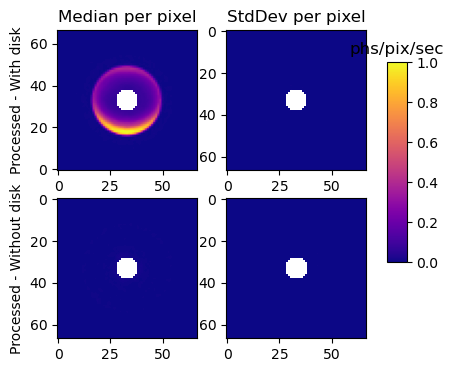

In [10]:
vmin = 0
vmax = 1

# Grab mean in annulus
x = np.linspace(-1,1,67)
y = x
x,y = np.meshgrid(x,y)
r = np.sqrt(x**2 + y**2)

notmask = (r< 0.15)
#notmask = (r>0.75) | (r< 0.25)
replace = np.nan

med_nd_raw[notmask] = replace
std_nd_raw[notmask] = replace
med_wd_raw[notmask] = replace
std_wd_raw[notmask] = replace

fig,ax = plt.subplots(ncols=2,nrows=2,figsize=[4,4])
cmap = ax[0,0].imshow(med_wd_raw,vmin=0,vmax=1)
ax[0,1].imshow(std_wd_raw,vmin=0,vmax=1)
ax[1,0].imshow(med_nd_raw,vmin=vmin,vmax=1)
ax[1,1].imshow(std_nd_raw,vmin=vmin,vmax=1)
ax[0,0].set_ylabel('Processed - With disk')
ax[0,0].set_title('Median per pixel')
ax[1,0].set_ylabel('Processed - Without disk')
ax[0,1].set_title('StdDev per pixel')
ax[0,0].invert_yaxis()
cax = fig.add_axes([0.95, 0.3, 0.05, 0.5])
cax.set_title('phs/pix/sec')
fig.colorbar(cmap, cax=cax)
plt.show()

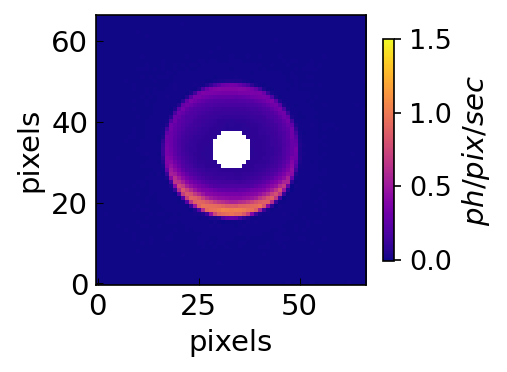

In [11]:
fig_dir='/Users/polaris/Onedrive-UA/OneDrive - University of Arizona/Debris-Disk-Modelling/Debris-Disk-Modelling/Eps-eri-Roman_pol/Simulations_paper/Figures/'
fig=plt.figure(dpi=150)
ax2=plt.subplot(121)
im2=ax2.imshow(med_wd_raw,
               cmap='plasma',vmax=1.5)
ax2.tick_params(which='both', direction='in', width=0.5, labelsize=14)
ax2.invert_yaxis()
ax2.set_ylabel('pixels',fontsize=14)
ax2.set_xlabel('pixels',fontsize=14)
ax2.set_title("")
cb=plt.colorbar(im2,orientation='vertical',shrink=0.4)
cb.set_label("$ph/pix/sec$",fontsize=14)
cb.ax.tick_params(labelsize=13)
#fig.savefig(fig_dir+'model_image_4.pdf', format='pdf', bbox_inches='tight')

In [252]:
#disk_file_dir='/Users/polaris/Onedrive-UA/OneDrive - University of Arizona/Debris-Disk-Modelling/Debris-Disk-Modelling/Eps-eri-Roman_pol/Simulations_paper/Revision/Fainter_disk/HLC/'

In [253]:
image0= fits.PrimaryHDU(med_wd_raw)
image1= fits.PrimaryHDU(med_nd_raw)
image0_hdul = fits.HDUList([image0])
image1_hdul = fits.HDUList([image1])
image0_hdul.writeto(disk_file_dir+'med_wd_'+diskfile.split('_')[t],overwrite=True)
image1_hdul.writeto(disk_file_dir+'med_nd_'+diskfile.split('_')[t],overwrite=True)


In [254]:
image_nosub=fits.PrimaryHDU(med_wd_raw)
imagens_hdul = fits.HDUList([image_nosub])
imagens_hdul.writeto(disk_file_dir+'nopsf_wd_'+diskfile.split('_')[t],overwrite=True)

In [12]:
image0= fits.PrimaryHDU(med_wd_raw)
image0_hdul = fits.HDUList([image0])
image0_hdul.writeto(diskfile_dir+'median_wd_hlc_'+diskfile.split('_')[t],overwrite=True)
image0= fits.PrimaryHDU(std_wd_raw)
image0_hdul = fits.HDUList([image0])
image0_hdul.writeto(diskfile_dir+'std_wd_hlc_'+diskfile.split('_')[t],overwrite=True)